# 데이터 시각화 서브플롯 위주로 연습

python에서는 그래프를 그리는 방법이 여러 개가 있다.  
특히나 한 화면에 그래프를 여러 개를 그릴 수 있는데 이번에는  

***fig, ax.subplots(nrows = , ncols = , ~)***   
***fig.set_size_inches(number1, number2)***   

을 이용한 방법을 학습한다.

참고1: [파이썬으로 시작하는 데이터 분석(도서)]  
참고2: [[파이썬 matplotlib] 그래프를 그리는 세가지 방법](https://pyvisuall.tistory.com/65?category=940899)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### step1. 서브플롯

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

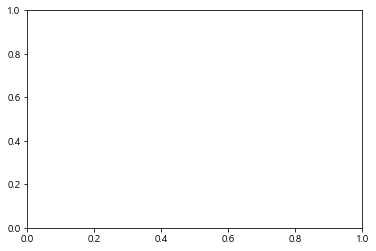

In [2]:
# 단일 서브플롯
plt.subplots() # default: 1x1

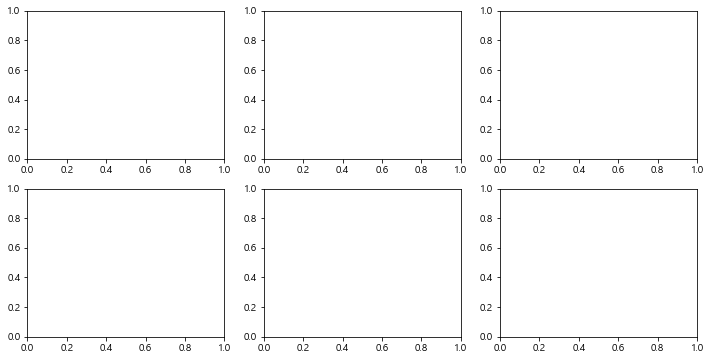

In [3]:
# 여러 개 서브플롯(1)
fig, ax = plt.subplots(2,3) # 여러 개 도화지 생성
fig.set_size_inches(12, 6) # 사이즈 설정

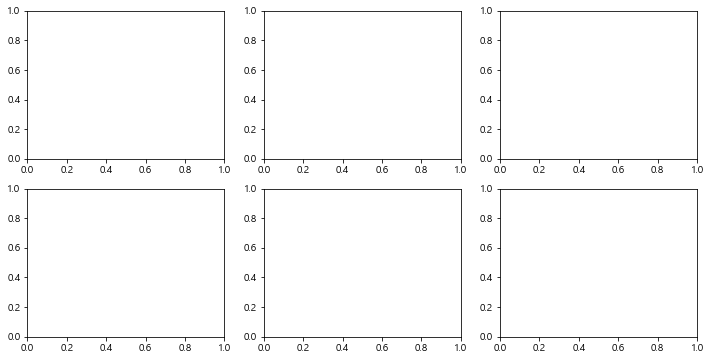

In [4]:
# 여러 개 서브플롯(2)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
fig.set_size_inches(12, 6) # 사이즈 설정

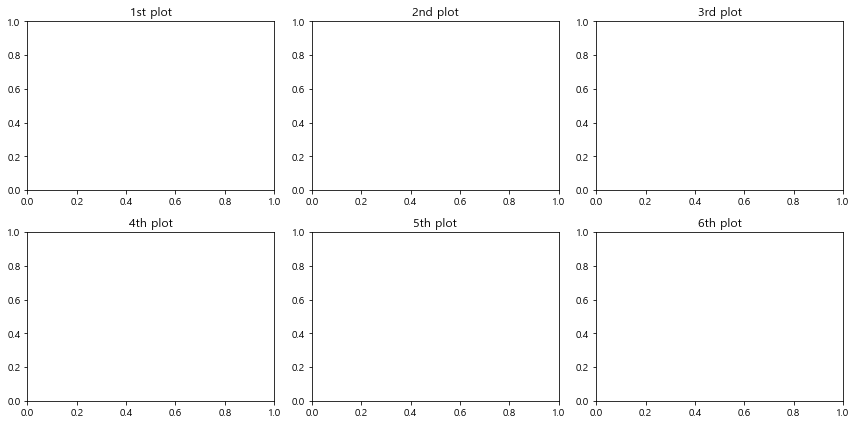

In [5]:
# 각 서브플롯에 이름 설정

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
fig.set_size_inches(12, 6)

ax1.set(title = '1st plot')
ax2.set(title = '2nd plot')
ax3.set(title = '3rd plot')
ax4.set(title = '4th plot')
ax5.set(title = '5th plot')
ax6.set(title = '6th plot')

plt.tight_layout() # 서브플롯 간 올바른 간격 자동 유지
plt.show()

### step2. matplotlib와 seaborn 함께 사용하기(1)

In [6]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


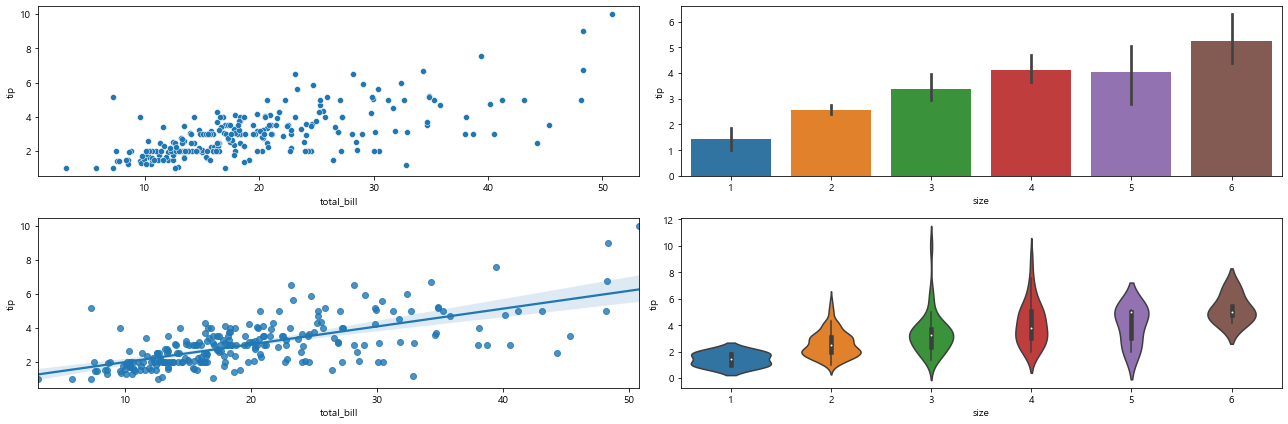

In [7]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(18, 6)

sns.scatterplot(x = df['total_bill'], y = df['tip'], ax = ax[0][0])
sns.barplot(x = df['size'], y = df['tip'], ax = ax[0][1])
sns.regplot(x = df['total_bill'], y = df['tip'], ax = ax[1][0]) # 회귀선, 위의 배경은 신뢰구간(default: 95%) 의미
sns.violinplot(x = df['size'], y = df['tip'], ax = ax[1][1])

plt.tight_layout() # 서브플롯 간 올바른 간격 자동 유지
plt.show()

### step3. matplotlib와 seaborn 함께 사용하기(2)

이번에는 x축을 공유할 수 있는 그래프를 작성해보자.

* *pointplot* 은 막대그래프에서 막대를 제외하고, 데이터의 평균값을 선으로 잇고 신뢰구간을 함께 표시한 그래프이다.
* set_title() 함수의 인자에는 fontsize 옵션이 있지만 set() 함수의 인자에는 fontsize 옵션이 없다.

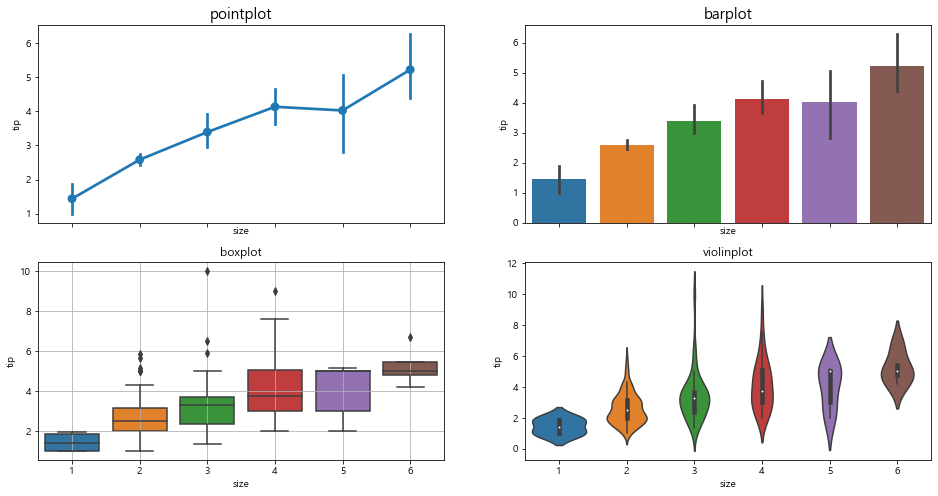

In [8]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True) # sharex = True: x축 공유
fig.set_size_inches(16, 8)

sns.pointplot(x = df['size'], y = df['tip'], ax = ax[0][0])
sns.barplot(x = df['size'], y = df['tip'], ax = ax[0][1])
sns.boxplot(x = df['size'], y = df['tip'], ax = ax[1][0])
sns.violinplot(x = df['size'], y = df['tip'], ax = ax[1][1])

ax[0][0].set_title('pointplot', fontsize = 15) # size or fontsize 옵션 둘 다 가능
ax[0][1].set_title('barplot', size = 15) # size or fontsize 옵션 둘 다 가능
ax[1][0].set(title = 'boxplot')
ax[1][1].set(title = 'violinplot')

ax[1][0].grid() # boxplot에만 격자(gird) 생성

plt.show()

### step4. matplotlib와 seaborn 함께 사용하기(3)

이번에는 여러 개의 서브플롯을 배치하는데, 윗 줄에는 작은 플롯 2개, 아랫줄에는 큰 플롯 1개를 배치하자.  
이 경우에는 **서브플롯을 두 개 생성**한다.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

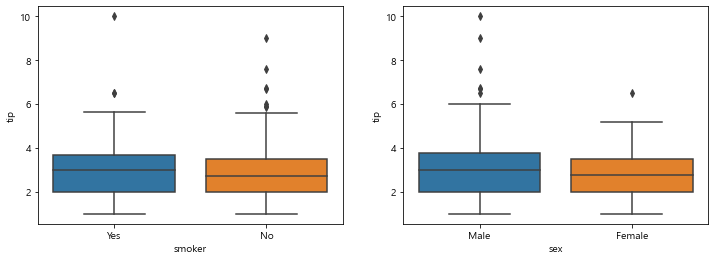

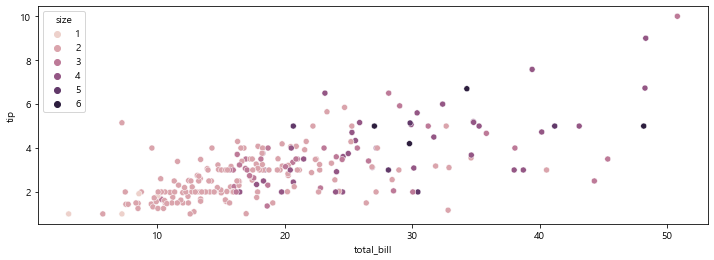

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(12, 4)

sns.boxplot(x = df['smoker'], y = df['tip'], ax = ax1)
sns.boxplot(x = df['sex'], y = df['tip'], ax = ax2)

fig, a3 = plt.subplots()
fig.set_size_inches(12, 4)
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', hue = 'size')